<a href="https://colab.research.google.com/github/kanjamwingirwa/KPMG_AU_Virtual_Internship/blob/kanja/KPMG_AU_INTERNSHIP_FINAL_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#lets load the libraries we require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import plotly.express as px
import warnings
warnings. filterwarnings("ignore")

In [27]:
#lets read the datasets. In this case, we will read a spreadsheet at a time since it has many sheets within the same file
transactions_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='Transactions')
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [28]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [29]:
Customer_Demographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerDemographic')
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [30]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

# **Data Cleaning**

In [31]:
#separate the date into year, month, day for exploration purposes
transactions_df['Year'] = transactions_df['transaction_date'].dt.year
transactions_df['Month'] = transactions_df['transaction_date'].dt.month
transactions_df['Day']  = transactions_df['transaction_date'].dt.day

In [32]:
#lets check whether the changes have been implemented
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21


<Axes: xlabel='standard_cost'>

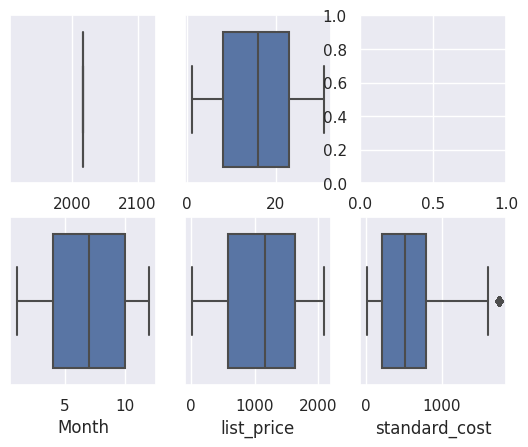

In [33]:
#lets look for outliers
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(x=transactions_df['Year'], ax=axes[0,0])

sns.boxplot(x=transactions_df['Day'], ax=axes[0,1])

sns.boxplot(x=transactions_df ['Month'], ax=axes[1,0])
sns.boxplot(x=transactions_df['list_price'], ax=axes[1,1])
sns.boxplot(x=transactions_df['standard_cost'], ax=axes[1,2])

There is an outlier in standard cost

In [34]:
#lets remove the outlier
# Calculate the upper and lower limits
Q1 = transactions_df['standard_cost'].quantile(0.25)
Q3 = transactions_df['standard_cost'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(transactions_df['standard_cost']>=upper)[0]
lower_array = np.where(transactions_df['standard_cost']<=lower)[0]

# Removing the outliers
transactions_df.drop(index=upper_array, inplace=True)
transactions_df.drop(index=lower_array, inplace=True)

In [35]:
#lets check if the chenge has been implemented
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19805 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19805 non-null  int64         
 1   product_id               19805 non-null  int64         
 2   customer_id              19805 non-null  int64         
 3   transaction_date         19805 non-null  datetime64[ns]
 4   online_order             19451 non-null  float64       
 5   order_status             19805 non-null  object        
 6   brand                    19608 non-null  object        
 7   product_line             19608 non-null  object        
 8   product_class            19608 non-null  object        
 9   product_size             19608 non-null  object        
 10  list_price               19805 non-null  float64       
 11  standard_cost            19608 non-null  float64       
 12  product_first_sold_date  19608 n

In [36]:
#lets drop all null values
transactions_df =transactions_df.dropna()

In [37]:
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21


In [38]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({1: 'January', 2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7:'July'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21


In [39]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({7: 'July', 8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21


In [41]:
#lets change day into actual name of the day in the week
transactions_df['Day_of_Week'] = transactions_df['transaction_date'].dt.day_name()
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday


In [42]:
#Replace online order column for it to make more sense
transactions_df['online_order'].replace({0.0: 'Not Online', 1.0: 'Online'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday
